## Tarea 4 - Modelamiento
### Cargo: Ciencia de Datos: Nicolas Alvarez Ortiz

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
import pandas as pd
credit = pd.read_csv("datosproyecto2")


In [107]:
credit[credit["default payment next month"] == 1] #6636
credit[credit["default payment next month"] == 0].head() #23364

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,6,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,7,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


¡OBSERVAMOS UN DESBALANCE EN LAS CLASES! \
Generamos nuestros vectores X & Y

In [114]:
X = credit.iloc[:,1:25]
y = credit["default payment next month"]

Realizamos un modelo utilizando sklearn y le aplicamos sobremuestreo a la data para balancear las clases.

In [116]:
#--------------------------------------------------------------
# Modelo con sklearn
#-------------------------------------------------------------- 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy = pipeline.score(X_valid, y_valid)
print(round(accuracy,5))

0.75972


In [127]:
from joblib import dump
dump(mlp_clf, 'modelo.joblib')

['modelo.joblib']

Generamos un reporte para evaluar las métricas del modelo

In [117]:
y_pred = mlp_clf.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9357
           1       0.27      0.39      0.32      2643

    accuracy                           0.63     12000
   macro avg       0.53      0.54      0.53     12000
weighted avg       0.68      0.63      0.65     12000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Graficamos la matriz de consufión del modelo (con sklearn)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


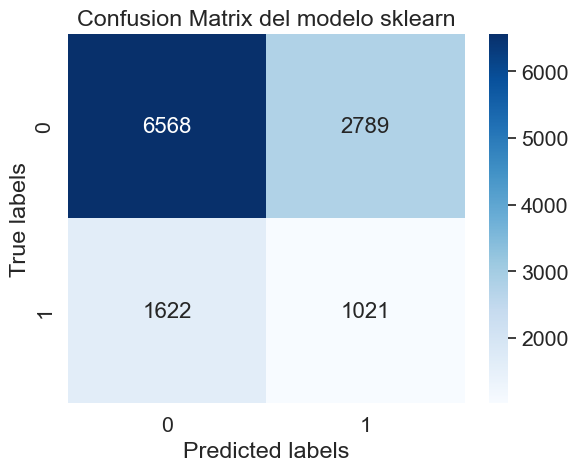

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model_predictions1 = mlp_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, model_predictions1)

# Plot confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="g")  # font size
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix del modelo sklearn')
plt.show()

### Oversampling vs Undersampling

Evaluamos undersampling (que suele ser mejor alternativa) para comparar cuál es mejor en este caso particular

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar oversampling a la clase pequeña
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
# Aplicar undersampling a la clase pequeña for comparison
rus = RandomUnderSampler(random_state=42)
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train, y_train)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy_oversampled = pipeline.score(X_valid, y_valid)

pipeline.fit(X_train_resampled_under, y_train_resampled_under)
accuracy_undersampled = pipeline.score(X_valid, y_valid)

print(accuracy_oversampled, accuracy_undersampled)
print("Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.")


0.7597222222222222 0.75375
Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.


SMOTE  y ADASYN son otras alternativas para tratar con bases desbalanceadas, por lo que evaluaremos su desempeño

In [92]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
resampling_techniques = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}
results = {}
for name, resampler in resampling_techniques.items():
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
    pipeline = make_pipeline(StandardScaler(), mlp_clf)
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    results[name] = accuracy
results


{'RandomOverSampler': 0.7597222222222222,
 'SMOTE': 0.7323611111111111,
 'ADASYN': 0.7281944444444445}

### Otro modelo usando Keras y tensorflow

In [93]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))  # Use sigmoid activation for binary classification
model.compile(loss="MeanSquaredError",  # Use binary cross-entropy for binary classification
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train_resampled, y_train_resampled, epochs=100,
                    validation_data=(X_valid, y_valid))



Epoch 1/100
527/527 [==============================] - 5s 7ms/step - loss: 0.4984 - accuracy: 0.4998 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 2/100
527/527 [==============================] - 4s 8ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 3/100
527/527 [==============================] - 4s 7ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 4/100
527/527 [==============================] - 3s 7ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 5/100
527/527 [==============================] - 3s 6ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 6/100
527/527 [==============================] - 5s 9ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753
Epoch 7/100
527/527 [==============================] - 5s 9ms/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.4998 - val_accuracy: 0.7753

In [94]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

375/375 [==============================] - 2s 4ms/step - loss: 0.4999 - accuracy: 0.7797
Test accuracy: 0.7797499895095825


Observamos que el modelo con keras y tensorflow tiene un test accuracy de 0.02 mejor que el de sklearn \
Sin embargo, debemos evaluar métricas  precisión, el recall y el f1-score para tener una visión más completa de la calidad del modelo

In [98]:
model_predictions = model.predict(X_test)
model_predictions

375/375 [==============================] - 2s 4ms/step


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [99]:
import numpy as np

model_predictions = np.where(model_predictions > 0.5, 1, 0)

Se observa que el f1-score para la clase Y=1 es tan solo se 0.08 y el recall es de 0.05 \
En el modelo de sklearn estas métricas son más altas para la clase Y=1 y para la clase Y=0 también son bastante altas para un modelo de clasificación

In [104]:
y_pred = mlp_clf.predict(X_test)
class_report = classification_report(y_test, model_predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      9357
           1       0.36      0.05      0.08      2643

    accuracy                           0.77     12000
   macro avg       0.57      0.51      0.48     12000
weighted avg       0.69      0.77      0.70     12000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


### ¿Cuáles son las características de los clientes que más influyen para que un cliente caiga de default (Y=1)?

In [121]:
import numpy as np
feature_names = X_train_resampled.columns
weights_input_hidden = model.layers[1].get_weights()[0]
average_weights = np.mean(weights_input_hidden, axis=1)
feature_weights = {feature_names[i]: weight for i, weight in enumerate(average_weights)}
sorted_features = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)
print("Características más importantes de clientes default (Y=1):")
for feature, weight in sorted_features:
    print(f"{feature}: {weight}")


Características más importantes de clientes default (Y=1):
SEX: 0.4050895571708679
ID: 0.23608747124671936
MARRIAGE: 0.1828126162290573
LIMIT_BAL: 0.059038370847702026
EDUCATION: -0.3418608605861664


Las características que más influyen para un default payment son: Sex, Marriage, limit_bal y education

### Comparemos nuestra red neuronal con un modelo de KNN (K-nearest neightbors)

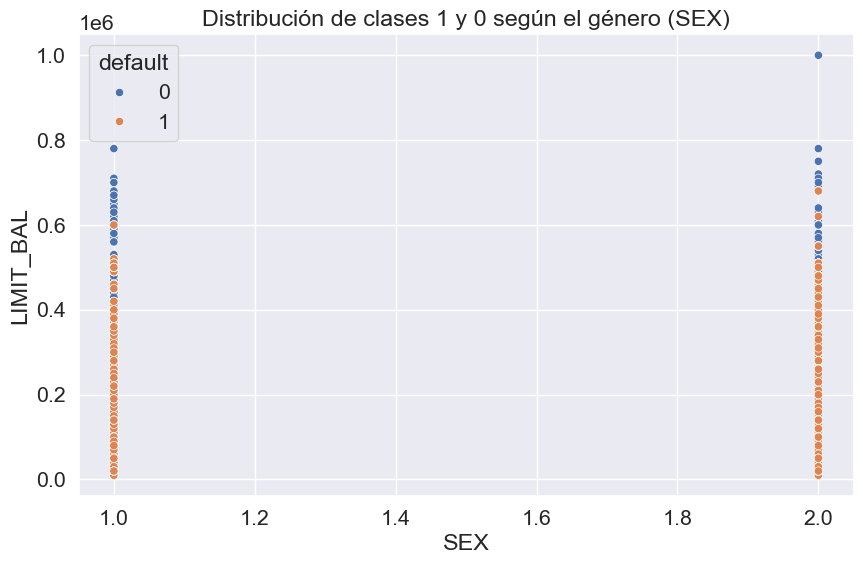

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
data = X_train_resampled.copy()
data['default'] = y_train_resampled
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SEX', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el género (SEX)')
plt.show()

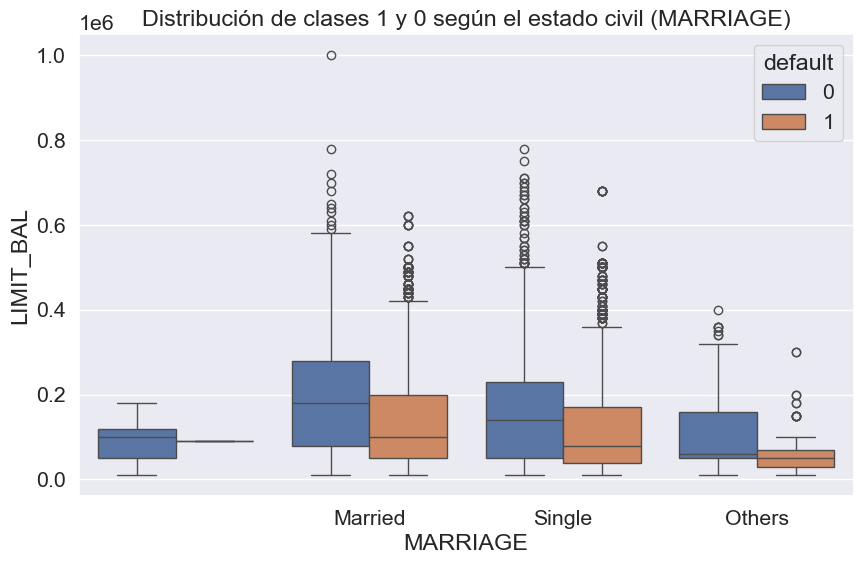

In [131]:
marriage_labels = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}
plt.figure(figsize=(10, 6))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el estado civil (MARRIAGE)')
plt.xticks(ticks=[1, 2, 3], labels=[marriage_labels[x] for x in [1, 2, 3]])
plt.show()

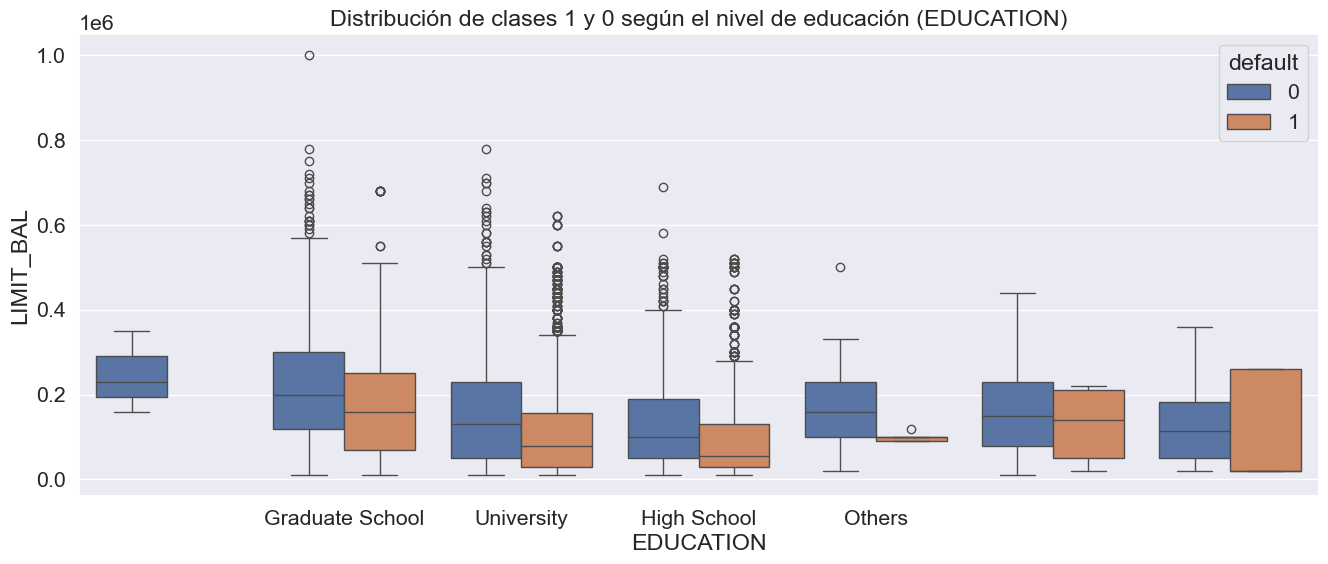

In [134]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
plt.figure(figsize=(16, 6))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el nivel de educación (EDUCATION)')
plt.xticks(ticks=[1, 2, 3, 4], labels=[education_labels[x] for x in [1, 2, 3, 4]])
plt.show()